# HW-1: 

* Neural network training is essentially a multi-variable optimization of a scalar field $y=f(\mathbf x)=f(x_1,x_2 ... x_N) $.
  * The local or global minima or maxima of  $y=f(\mathbf x)=f(x_1,x_2 ... x_N) $ satisfy the condition $ \mathbf \nabla f(x) = 0$ where $\mathbf \nabla f(x)=(\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2} \dots \frac{\partial f}{\partial x_N})$ is the gradient, i.e. the vector or partial derivatives. 
* The most common form of numerical optimizers are "gradient based" methods. 
* Such methods  "follow" the gradient, i.e. the vector of partial derivatives, 'downhill' into local minima in the optimization space. 
* Therefore in this homework we focus on some fundamental concepts associated with numerical optimization, including numerical derivatives, solvers, and optimizers. 
* We then apply these tools to a simple regression example.

**Instructions** 
* Read and work through all tutorial content and do all exercises below
  
**Submission:**
* You need to upload TWO documents to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
  * (2) The .ipynb version of the completed form of this notebook 
  * Failure to submit BOTH versions will result in a 10% deduction per missing document.
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc
* **Total points:** 41.66


## Reading assignment: 

Please read the following chapter in the course textbook

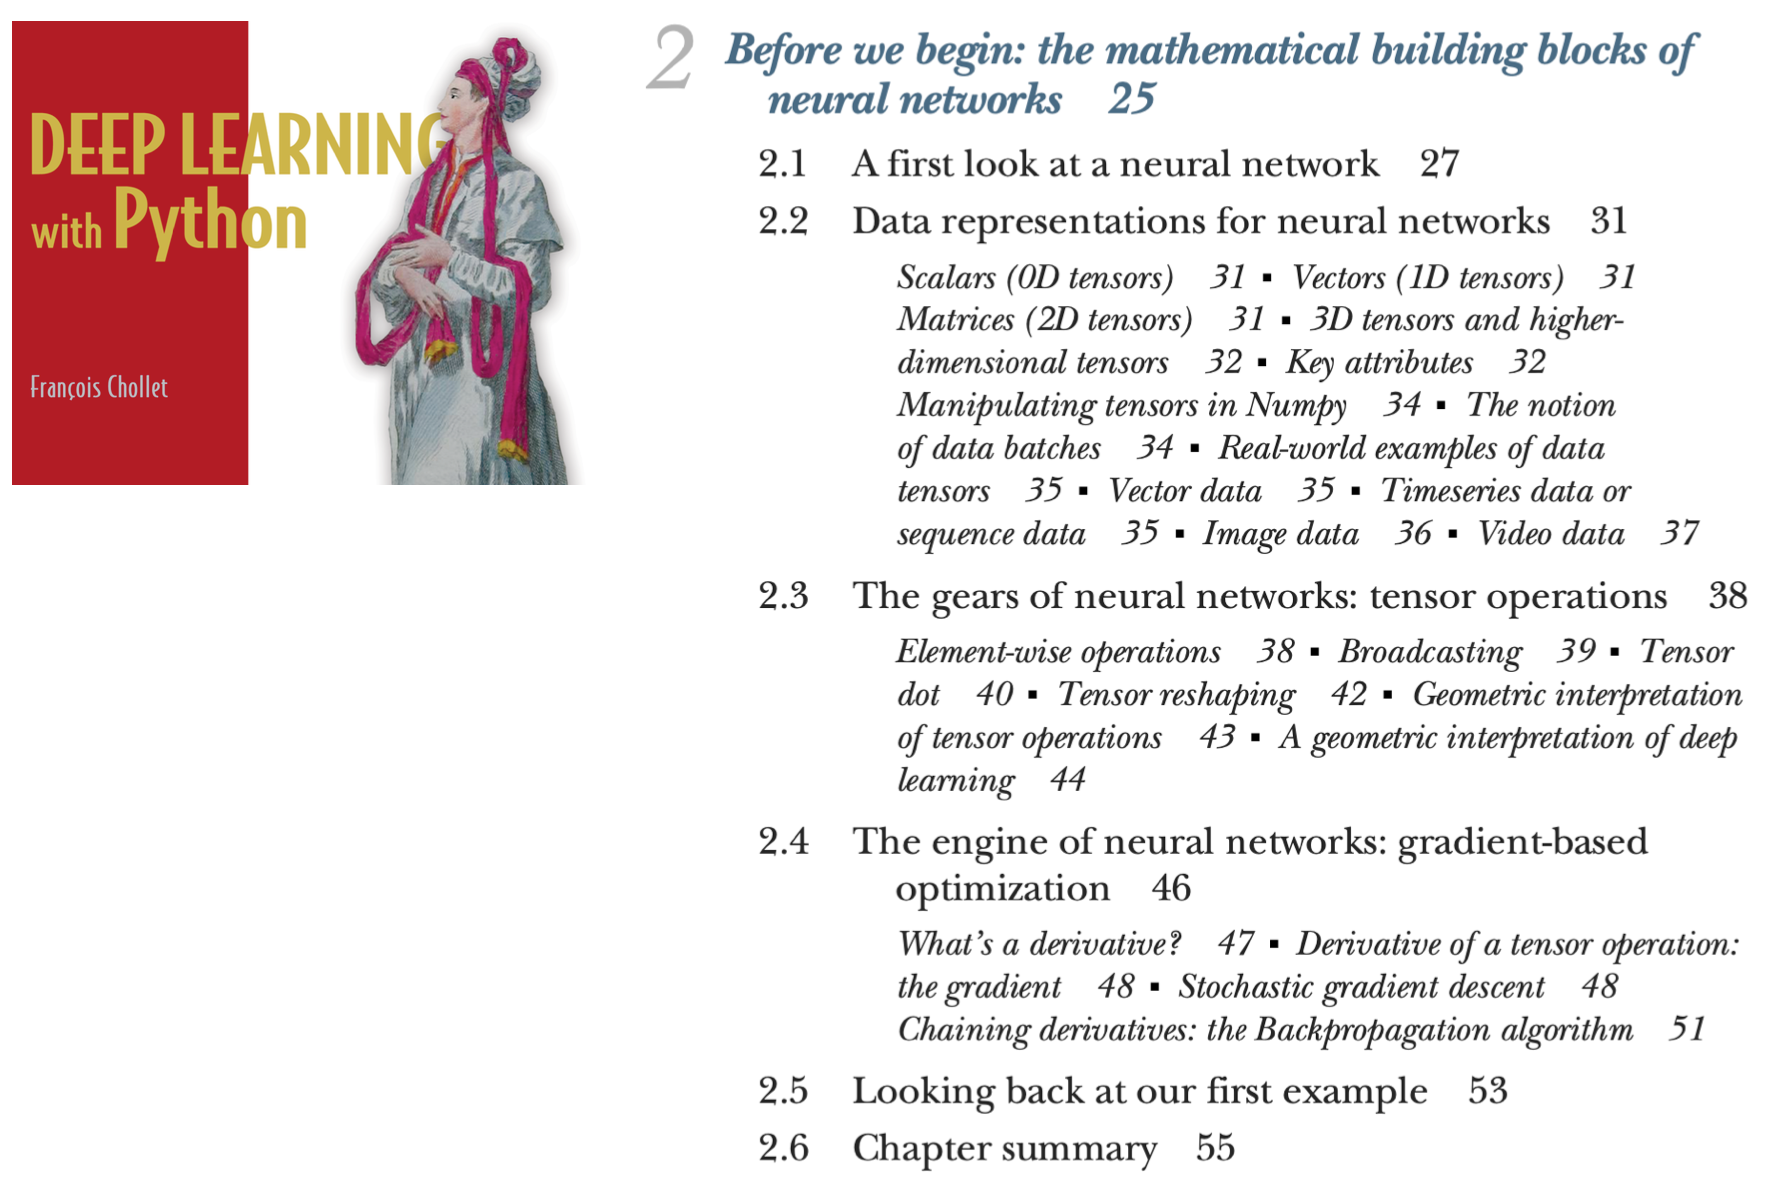

In [1]:
from IPython.display import Image
Image(filename='images/reading.png',width=700)


## Math fundamentals 

**Mathematical paradigms** 

* When performing mathematics, we typically have two options, as demonstrated in the following image. 
* Often, it is preferable to take the "numerical" route. In this case we just let the computer do the work for us, rather than computing derivatives or integrals by hand with pen and paper.
* This is the route that will be typically be used in this course, however, during module-1 you will be expected to also do some pen and paper work. 


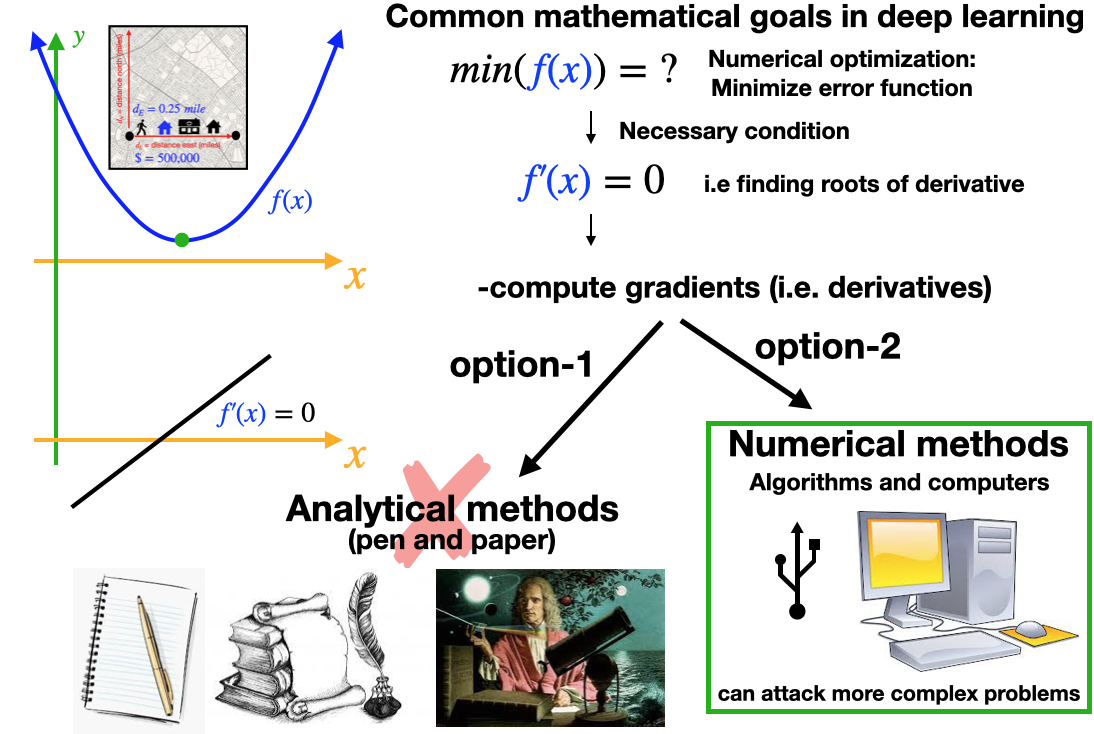

In [2]:
Image(filename='images/paradigms.png',width=700)

## Numerical Derivatives 

Given a function $y=f(x)$, we can compute a derivative, denoted $f'(x)$, with respect to it's independent variable $x$.

The derivative has the meaning of the instantaneous slope of the function at any point point $x$,  i.e. the slope of the tangent line. 

We can approximate the tangent line, via the secant line, using any two points on the curve. 

The closer the points are, i.e. the smaller $\Delta x$, the better the approximation.

This idea is summarized in the following image

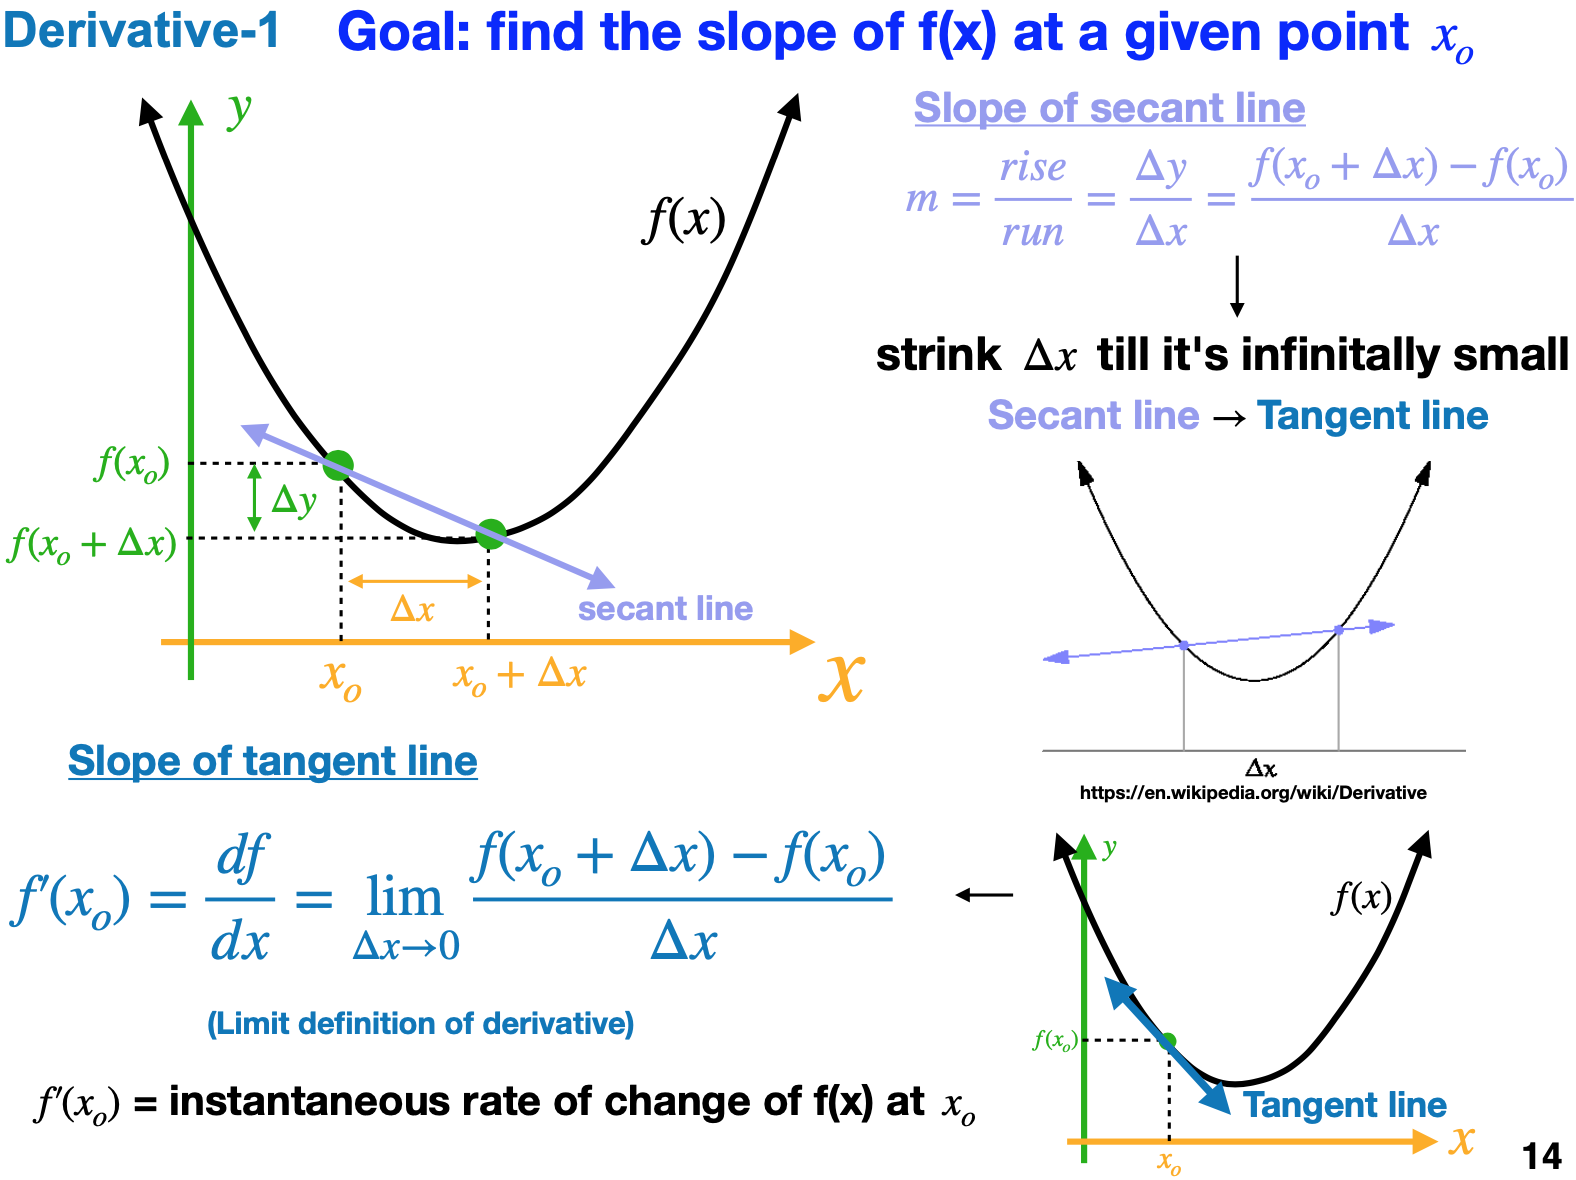

In [3]:
Image(filename='images/derivative.png', width=700)

When our system has a time-dependence, the in-dependent variable becomes $t$ instead of $x$. 

Due to the finite precision (and memory) of a computer, we can only store functions as list, not continuous functions. As demonstrated in the following image

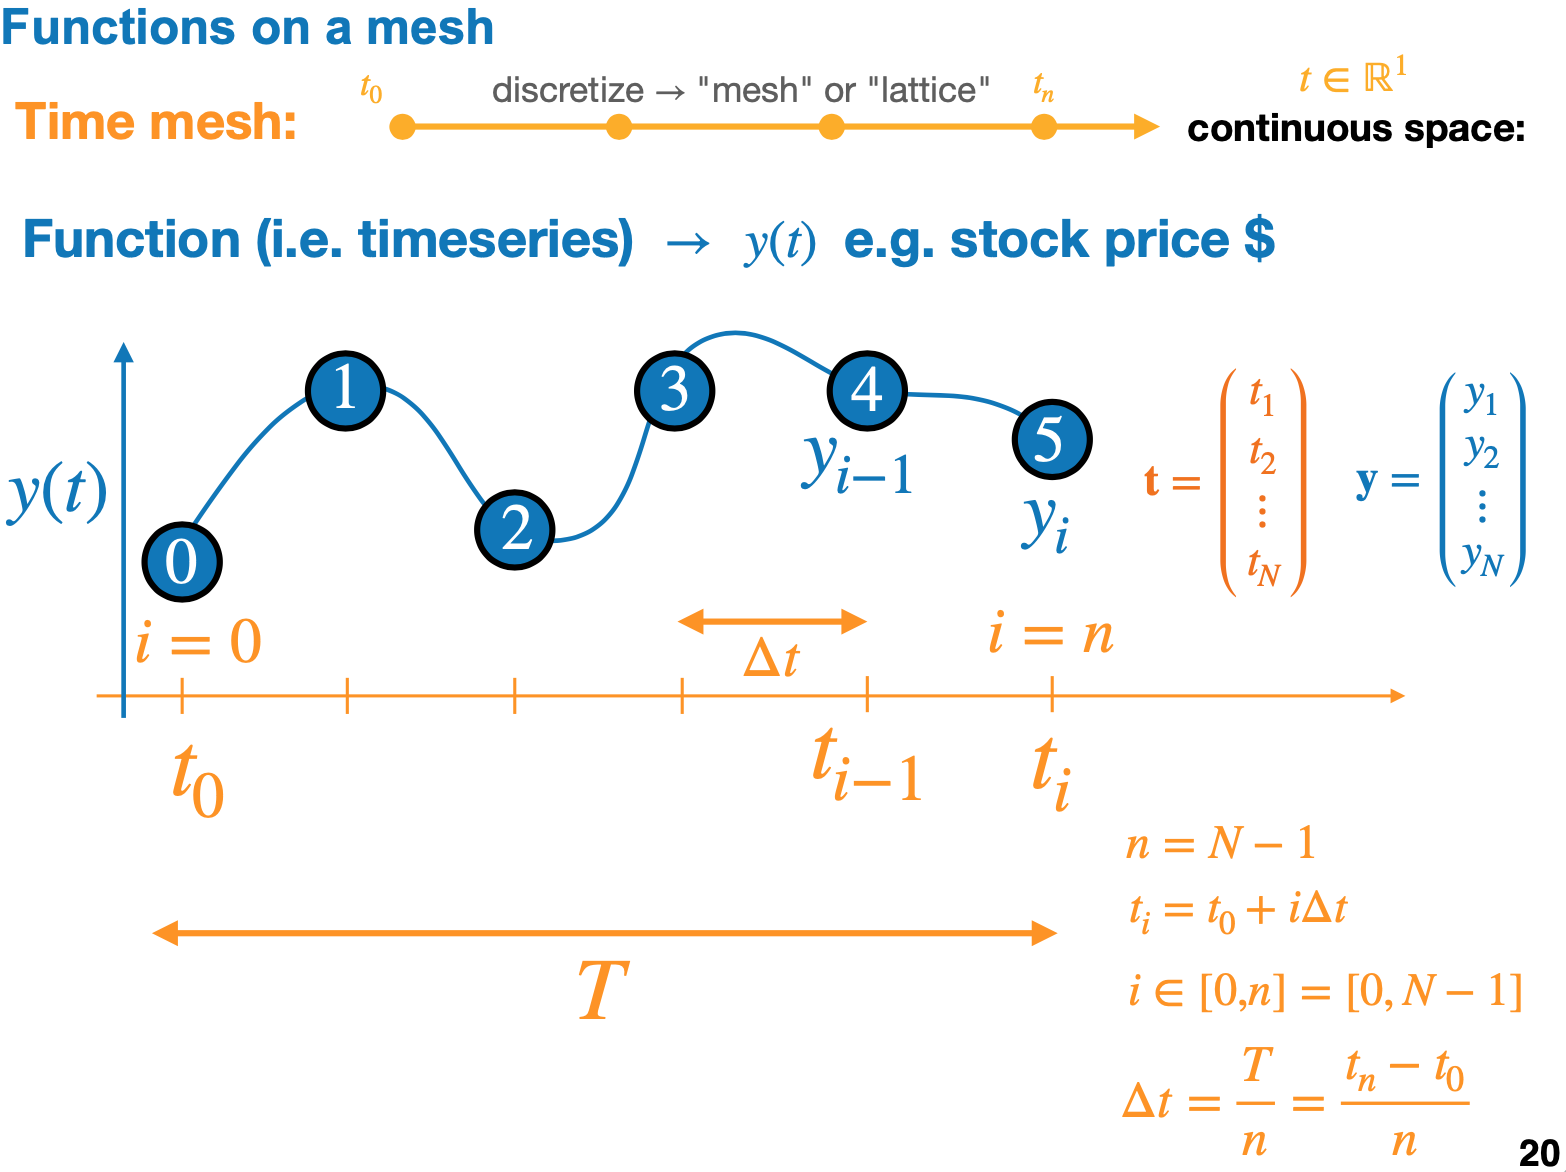

In [4]:
Image(filename='images/image-2.png', width=700)

Therefore, the secant line is a typical method when trying to compute a derivative inside computers.

Approximating the derivative with the secant line is also known as the finite difference approximation of the derivative. 

Later in the course, we will discuss a more sophisticated and elegant method for computing the derivative, known as "back propagation". The back-propagation method is more commonly used in deep learning, however, finite differences are easier to understand educationally and are also an important computational tool in many algorithms. Therefore, we will start with finite differences before moving onto back-propagation.

There are several different finite-difference formulas for the first derivative of varying accuracy, as shown in the following image. 

For more see: https://en.wikipedia.org/wiki/Finite_difference

**IMPORTANT:** This method can easily be generalized to compute the gradient (vector of partial derivatives) of multi-variable scalar field. 


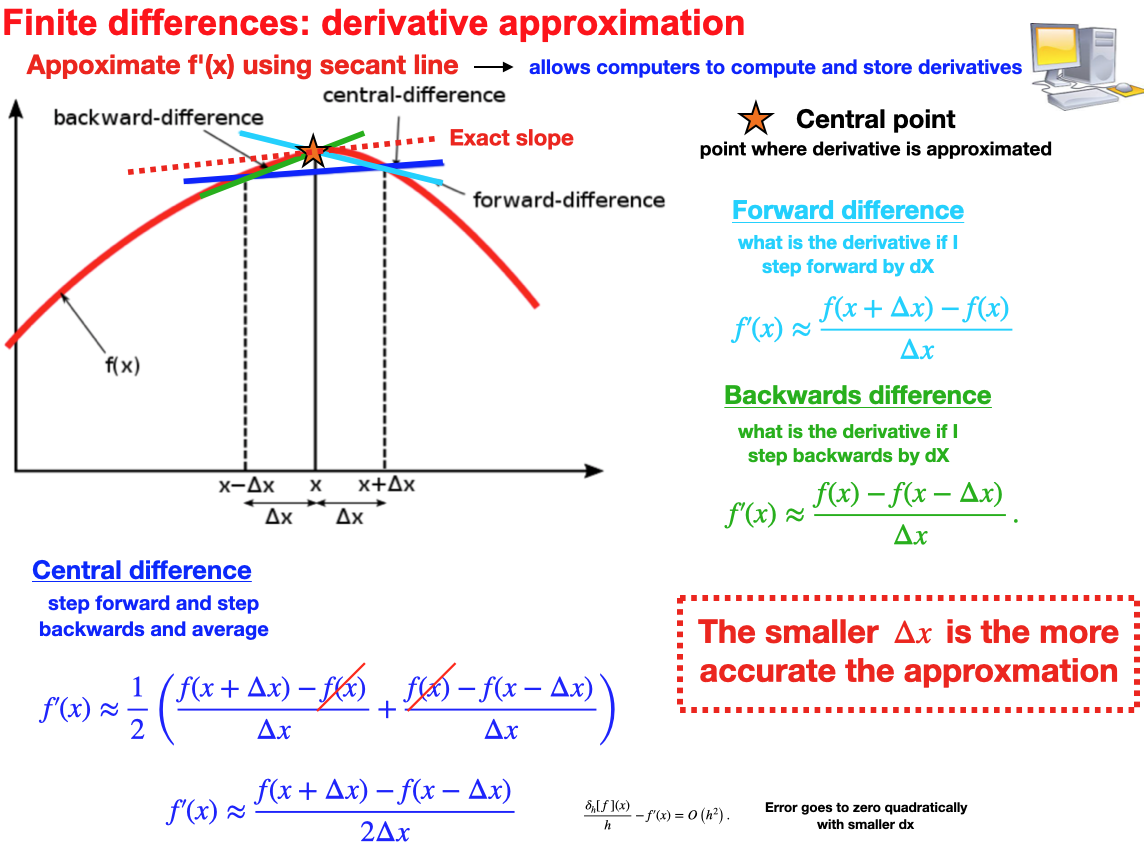

In [5]:
Image(filename='images/image-3.png', width=700)

**ASSIGNMENT: HW-1.1** (2.166 points)
* Write a function `def dy_dx(x,y)` that takes two numpy arrays x,y where y=f(x)
  * Returns a vector, of same dimension as x and y, with the first derivative, computed using finite difference
  * For dy_dx[0] use forward difference 
  * for dy_dx[1:N-1] use central difference
  * for dy_dx[N] us backward difference 
  * Note this can be done with three lines in numpy, using a "vectorized" formalism, OR with a for-loop
* Test your function by plotting the derivative of f(x)=x^3+x^2 with both the numerical and analytic solution, where the derivative is df/dx=3x^2+2x

In [6]:
# INSERT CODE HERE
def dy_dx(x,y):
    #INITIALIZE GRADIENT VECTOR
    dy_dx=np.zeros(len(x))
    dy_dx[0] = (y[1] - y[0])/(x[1] - x[0])
    dy_dx[1:len(x)-1] = (y[2:len(x)] - y[0:len(x)-2])/(x[2:len(x)] - x[0:len(x)-2])
    dy_dx[len(x)-1] = (y[len(x)-1] - y[len(x) - 2])/(x[len(x)-1] - x[len(x) - 2])
    return dy_dx

In [7]:
import numpy as np
N1 = 100
x1 = np.linspace(-10,10,N1)
y1 = x1**3 + x1**2
test_n = dy_dx(x1,y1)
test_a = 3*x1**2 + 2*x1 

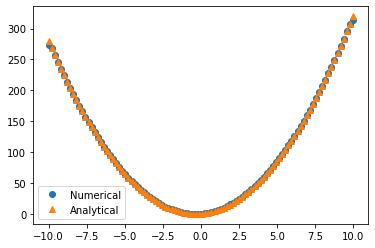

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, test_n, 'o', label='Numerical')
ax.legend()
ax.plot(x1, test_a, '^', label='Analytical')
ax.legend()

This method can easily be generalized to to compute the partial derivative terms of the gradient. 
* In the following image h is the step size (i.e. $ h=\Delta x $)

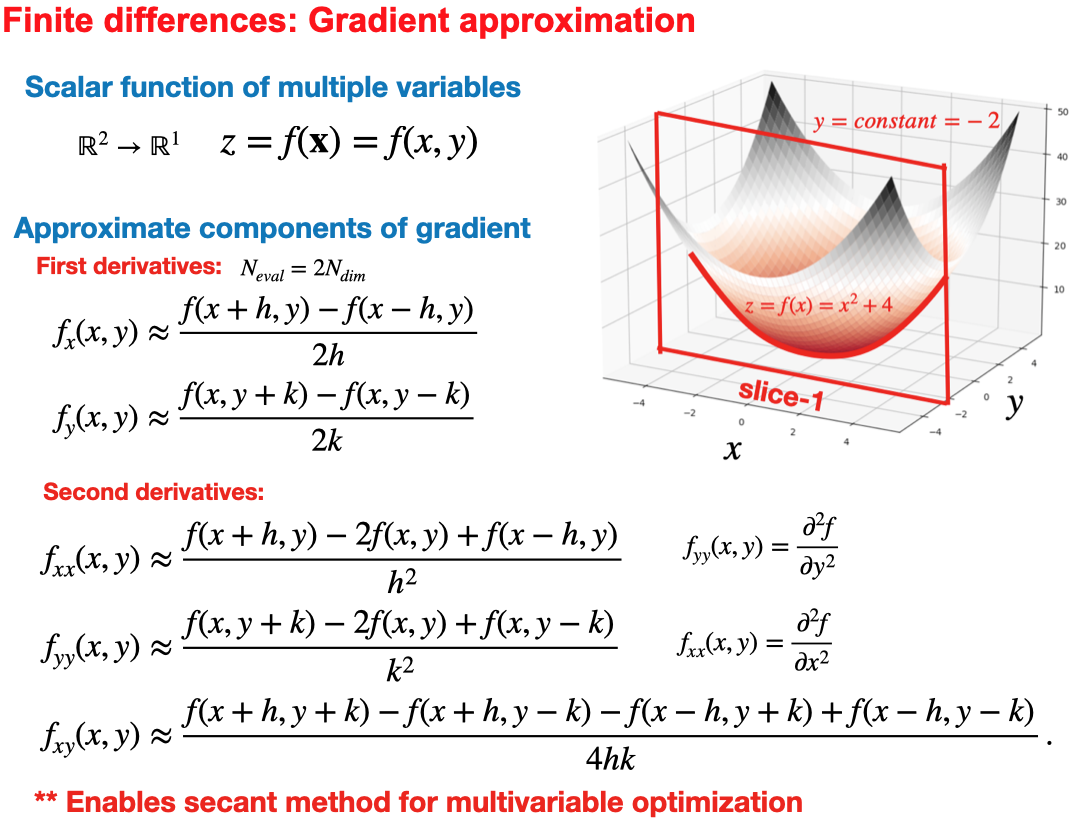

In [9]:
Image(filename='images/partial.png', width=700)

**ASSIGNMENT: HW-1.2** (7.5 points)

* The previous sub-assignment computed the derivate at each x-point, however, often we just need to compute the "local" derivative around one x point denoted x0

* Write a python function `def f(x)` which returns a multi-variable scalar field $y=f(\mathbf x)=f(x_1,x_2 ... x_N) $, an arbitrary input dimension N.
  * For simplicity, just use $y=f(\mathbf x)=f(x_1,x_2,x_3)=2.718 x_1^2+3.14 x_2+1.0 x_3+2 $ 
  * compute the gradient of this function "by hand" to make sure your numerical implementation matches the analytical result
<br></br>
* Write a function `def grad(f,x0,dx)` that;
  * takes this f function as an input 
    * see the following link for information on passing a function as an argument to another function. 
    * https://www.geeksforgeeks.org/passing-function-as-an-argument-in-python/
  * Returns the gradient vector, as a numpy array, computed around the point x0 by using the multi-variable finite difference with a step size equal to dx.
* test the function by computing the gradient vector around $\mathbf x=(x_1,x_2,x_3)=(1,2,3)$

In [10]:
# INSERT YOUR CODE HERE
import numpy as np
def f(x):
    y = 2.718*x[0] ** 2 + 3.14*x[1] + 1.0*x[2] +2
    return y
    
def grad(f, x0, dx = 0.0001):
    #INITIALIZE GRADIENT VECTOR
    df_dx=np.zeros(x0.shape)
    #ITERATE OVER DIMENSIONS
    for i in range(0,len(df_dx)):
        #DEFINE PERTURBATION VECTOR
        DX=np.zeros(x0.shape)
        DX[i]=dx
        #APPLY CENTRAL DIFFERENCE ABOUT POINT x0
        df_dx[i]=(f(x0+DX)-f(x0-DX))/(2*dx)
    return df_dx
x0 = np.array([1,2,3])
gradient = grad(f,x0)
gradient

array([5.436, 3.14 , 1.   ])

**ASSIGNMENT: HW-1.3** Code a multi-variable optimizer (21.5 points)

* The following sub-assignment is a copy of Lab-1.1, however, you will need to code the optimizer yourself, rather than using the Scipy optimizer.

* Copy the regression workflow from your COMPLETED lab-1.1 assignment 
  
* Replace the SciPy optimizer with your own optimizer function
* Have the optimizer take the objective (loss) function as an argument, along with various default options 
  * `def optimizer(objective, algo=‘GD’, LR=0.001, method=‘batch’):`
* Code the optimizer so it can train using batch, mini-batch or stochastic paradigms
  * For minibatch use a 0.5 batch size
* Code the following optimizers for a general N-dimensional optimization problem (i.e don't hardcode for a specific dimensionality)
  * Gradient decent (GD) 
  * GD+momentum
  * RMSprop
  * Nelder-Mead (optional extra credit +2.5 points)
  * For gradient based methods compute derivatives numerically using finite difference 
* Add two more plots on top of lab-1.1
  * A parity plot where you plot y_pred vs y_data for both validation and training data (Note: the line y=x represents a perfect fit)
  * A "time-series plot" showing "training_error" and "validation_error" as a function of the ith iteration of the optimizer 

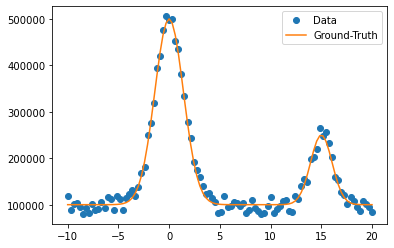

In [11]:
import matplotlib.pyplot as plt

#GROUND TRUTH FUNCTION
def G(x):
    out=400000.0*np.exp(-((x-0.0)/2.0)**2.0)
    out=out+150000.0*np.exp(-((x-15.0)/1.5)**2.0)
    out=out+100000
    return out

#NOISY DATA
N=100; xmin=-10; xmax=20
x = np.linspace(xmin,xmax,N)
ye = G(x)  #PRISTINE DATA
#noise=np.random.normal(loc=0.0, scale=0.05*(max(y)-min(y)),size=len(x))
noise=0.05*(max(ye)-min(ye))*np.random.uniform(-1,1,size=len(x))
y = ye + noise

x_train_r = x.reshape(N,1)
y_train_r = y.reshape(N,1)

#PLOT DATA
fig, ax = plt.subplots()
ax.plot(x_train_r, y_train_r, 'o', label='Data')
ax.plot(x_train_r, ye, '-', label='Ground-Truth')
ax.legend()

In [12]:
def loss(p):
    return (np.sum((y_train-m(x_train,p))**2.0))*0.5

In [13]:
#PARTITION DATA
indices = np.random.permutation(x_train_r.shape[0])
CUT=int(0.8*x_train_r.shape[0]); #print(CUT,x.shape,indices.shape)
training_idx, val_idx = indices[:CUT], indices[CUT:]
x_train_full, y_train_full =  x_train_r[training_idx,:], y_train_r[training_idx,:]
x_val_full, y_val_full =  x_train_r[val_idx,:], y_train_r[val_idx,:]

In [14]:
#normalize
ux=np.mean(x_train_full)
sx=np.std(x_train_full)
uy=np.mean(y_train_full)
sy=np.std(y_train_full)

#TRAINING
x_train_full = (x_train_full-ux)/sx
y_train_full = (y_train_full-uy)/sy

#VALIDATION
x_val_full = (x_val_full-ux)/sx
y_val_full = (y_val_full-uy)/sy

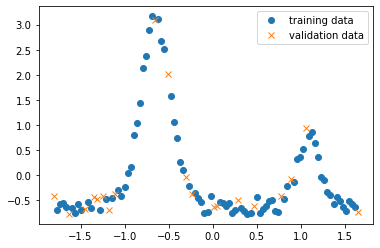

In [15]:
fig, ax = plt.subplots()
ax.plot(x_train_full, y_train_full, 'o', label='training data')
ax.plot(x_val_full, y_val_full, 'x', label='validation data')
ax.legend()

In [16]:
#Define my model
def m(x,p):
    return p[0]*np.exp(-((x-p[1])/p[2])**2.0)+p[3]*np.exp(-((x-p[4])/p[5])**2.0)+p[6]

In [19]:
iterations=[]
training_error=[]
validation_error = []
def optimizer(objective, p0, algo="GD", LR= 0.001, method='batch'): 
    global x_train, y_train
    #PARAM
    iteration=1 #ITERATION COUNTER
    max_iter=10000

    pi=p0 #INITIAL GUESS
    
    #START OPTIMIZATION LOOP
    while(iteration<=max_iter):
        
        if(method=='batch'):
            if(iteration==1): 
                x_train=x_train_full
                y_train=y_train_full

        if(method=='mini_batch'):
            #SWITCH EVERY OTHER ITERATION
            if(iteration%2==0):
                x_train=x_train_full[0:int(x_train_full.shape[0]/2)]
                y_train=y_train_full[0:int(y_train_full.shape[0]/2)]
                
            else:
                x_train=x_train_full[int(x_train_full.shape[0]/2):-1]
                y_train=y_train_full[int(y_train_full.shape[0]/2):-1]
                
                
        #SAVE HISTORY FOR PLOTTING 
        iterations.append(iteration)
        training_error.append(objective(pi))
        
        mse_val = np.sum((y_val_full - m(x_val_full, pi))**2)/len(y_val_full)
        rmse_val = np.sqrt(mse_val)
        validation_error.append(rmse_val)
        
        iteration+=1
        
        #COMPUTE GRADIENT 
        dl_dp=grad(objective,pi)

    
        #REPORT
        if(iteration % 1000 == 0):
            print("ITERATION=", iteration)
            print("p[i]=", pi, " ---> loss(p)=", objective(pi))
            print("gradient=", dl_dp)

        #TAKE A OPTIMIZER STEP
        if(algo =="GD"):
            pi=pi-LR*dl_dp
            
        elif(algo == "GD+momentum"):
            if iteration == 1:
                beta = 0.9
                g0 = 0
            else:
                g0 = beta*g0 + (1-beta)*dl_dp
                pi=pi-LR*g0
            
        elif(algo == "RMSprop"):
            alpha = 0.3
            if iteration == 2:
                g0 = (1-beta)*(dl_dp **2)
                pi = pi-g0
            else:
                g0 = beta*g0 + (1-beta)*(dl_dp **2)
                pi = pi - (alpha/np.square(g0+10**(-8)))*dl_dp
    return pi

In [20]:
# MANUAL GUESS
pp=np.array([3.,-0.5,0.1,1,1.2,0.1,-0.5])

#TRAIN
res = optimizer(loss, pp)
popt=res
print("OPTIMAL PARAM:",popt)

# PREDICTION 
yp_train=m(x_train_full,popt)
yp_val=m(x_val_full,popt)

ITERATION= 1000
p[i]= [ 3.73917714 -0.65090515  0.23725226  1.40382129  1.08834995  0.17777143
 -0.60961758]  ---> loss(p)= 0.3853710074263643
gradient= [-5.16066795e-02 -7.24032631e-05  1.43271864e-03 -6.14220958e-02
  4.51729476e-05  3.92163482e-03  6.72228782e-03]
ITERATION= 2000
p[i]= [ 3.75201044 -0.65088701  0.23691653  1.42307354  1.08833642  0.17648283
 -0.6114584 ]  ---> loss(p)= 0.3844057822579889
gradient= [-1.05348886e-03 -1.54029789e-06  2.05198319e-05 -2.90683738e-03
  1.84935567e-06  2.10180415e-04  2.10336258e-04]
ITERATION= 3000
p[i]= [ 3.75228764 -0.6508866   0.23691188  1.42397718  1.08833586  0.17641659
 -0.61152008]  ---> loss(p)= 0.3844042442171203
gradient= [-2.77804776e-05 -4.29306590e-08  2.31658026e-07 -1.33886643e-04
  7.95097321e-08  1.00507735e-05  8.16527873e-06]
ITERATION= 4000
p[i]= [ 3.75229547 -0.65088658  0.23691184  1.42401862  1.08833583  0.17641347
 -0.61152255]  ---> loss(p)= 0.38440424116294647
gradient= [-9.48782164e-07 -1.52267088e-09 -3.208544

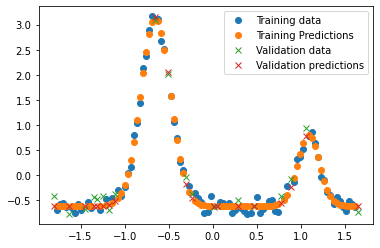

In [21]:
#PLOT THE RESULTS IN THE NORMALIZED SPACE
fig, ax = plt.subplots()
ax.plot(x_train_full, y_train_full, 'o', label='Training data')
ax.plot(x_train_full, yp_train, 'o', label='Training Predictions')
ax.plot(x_val_full, y_val_full, 'x', label='Validation data')
ax.plot(x_val_full, yp_val, 'x', label='Validation predictions')
ax.legend()

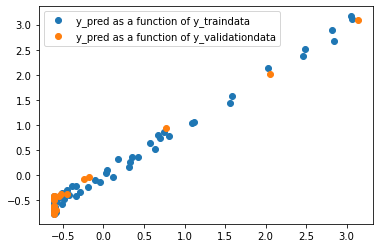

In [22]:
# PREDICTION PLOT
fig, ax = plt.subplots()
ax.plot(yp_train, y_train_full, 'o', label='y_pred as a function of y_traindata')
ax.plot(yp_val, y_val_full, 'o', label='y_pred as a function of y_validationdata')
ax.legend()

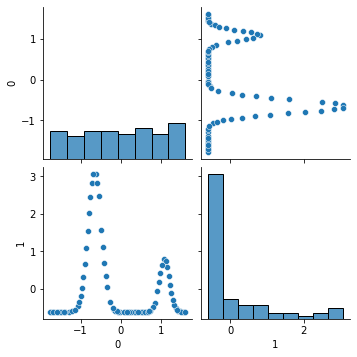

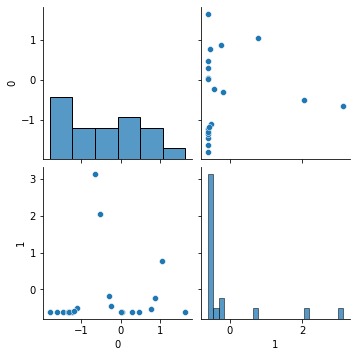

In [23]:
# pairity plot
import pandas as pd
import seaborn as sns
df_train = pd.DataFrame(np.concatenate([x_train_full, yp_train],axis = 1))
sns.pairplot(df_train)
plt.show()
df_val = pd.DataFrame(np.concatenate([x_val_full, yp_val],axis = 1))
sns.pairplot(df_val)
plt.show()

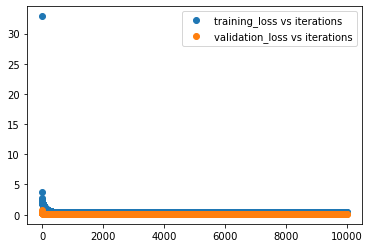

In [24]:
#history plot
fig, ax = plt.subplots()
ax.plot(iterations, training_error, 'o', label='training_loss vs iterations')
ax.legend()
ax.plot(iterations, validation_error, 'o', label='validation_loss vs iterations')
ax.legend()


**ASSIGNMENT: HW-1.4** Analytical assignment (10 points)

* Work through the following math problems relevant to deep learning (show your work and all steps)

* You can do this either by (1) doing the math inside .ipynb using LaTex OR (2) doing it with pen and paper, taking photographs, and embedding the solutions into the .ipynb as images.  

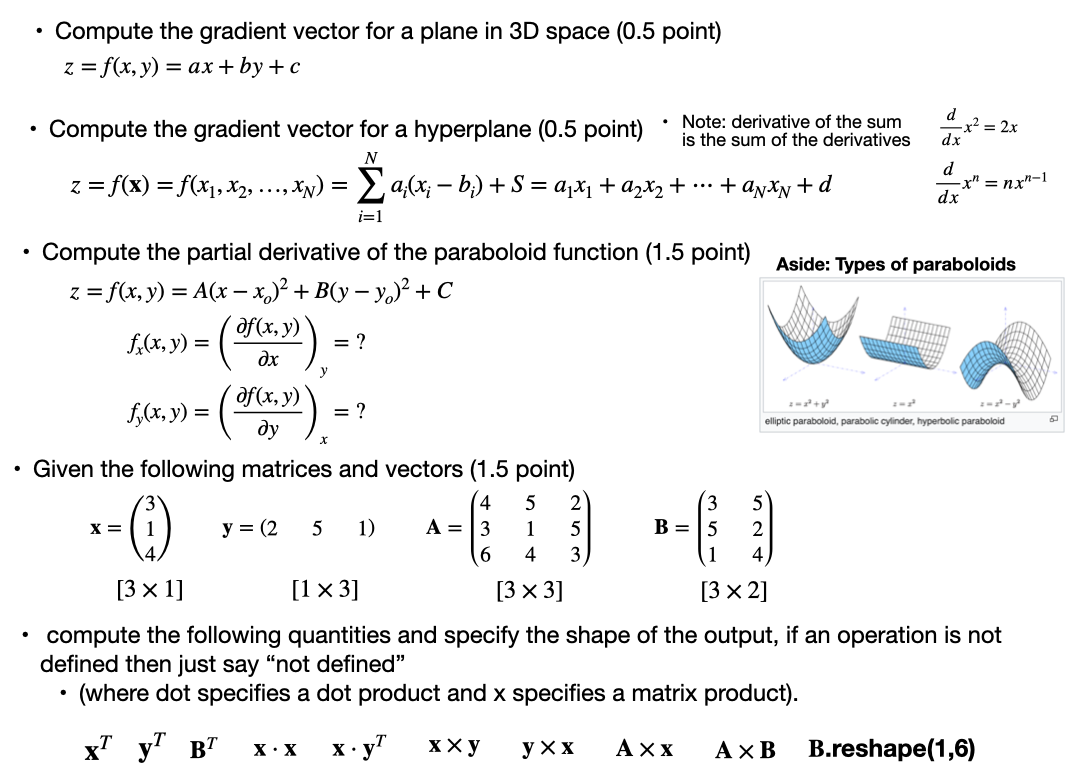

In [25]:
Image(filename='images/math-1.png', width=700)

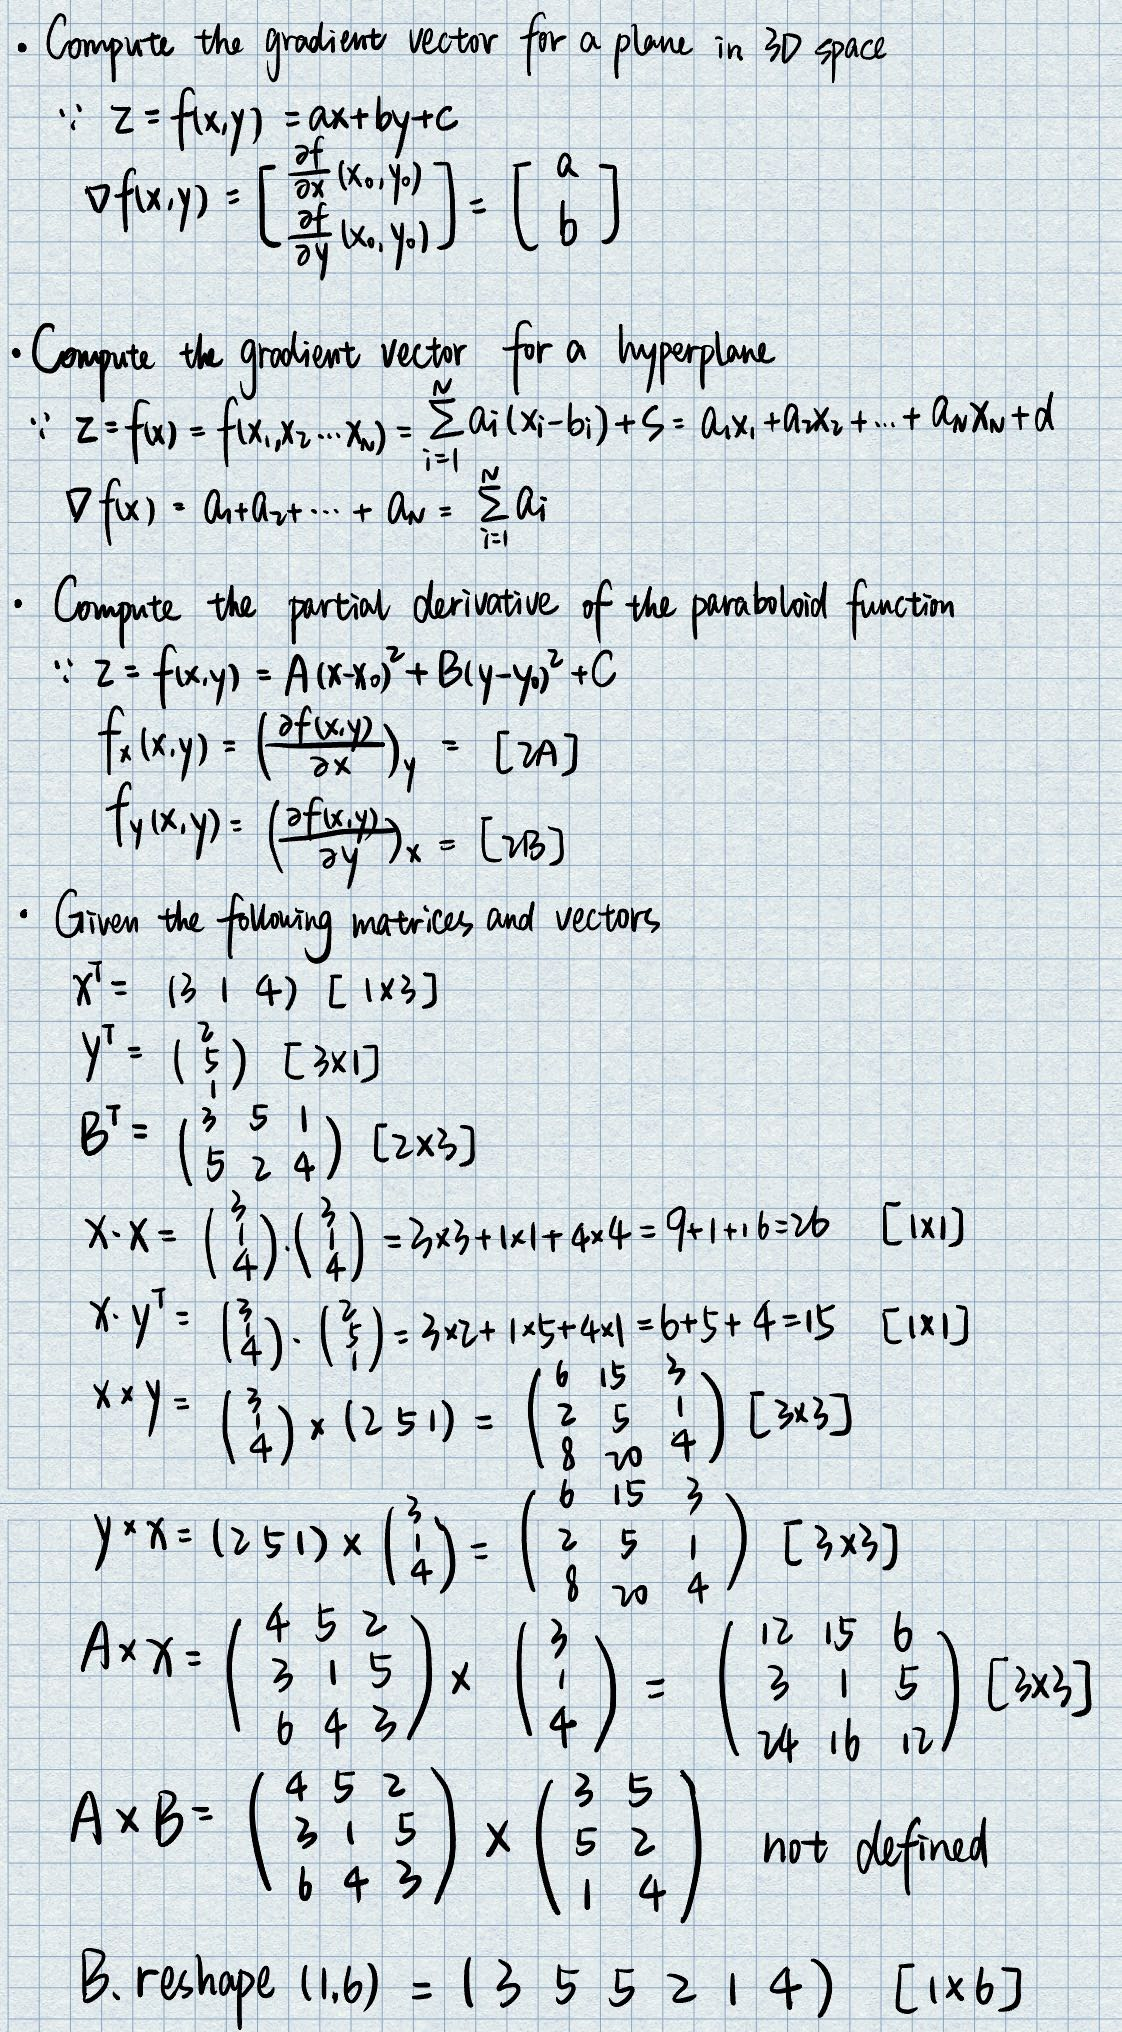

In [44]:
Image(filename='images/prob4_1.jpeg', width=700)

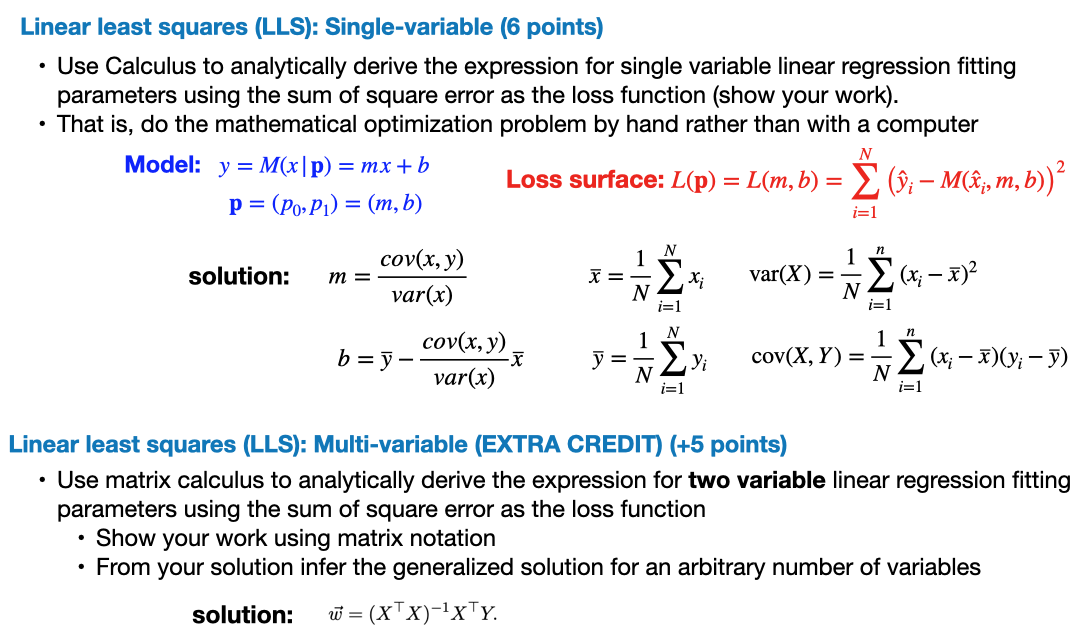

In [26]:
Image(filename='images/math-2.png', width=700)

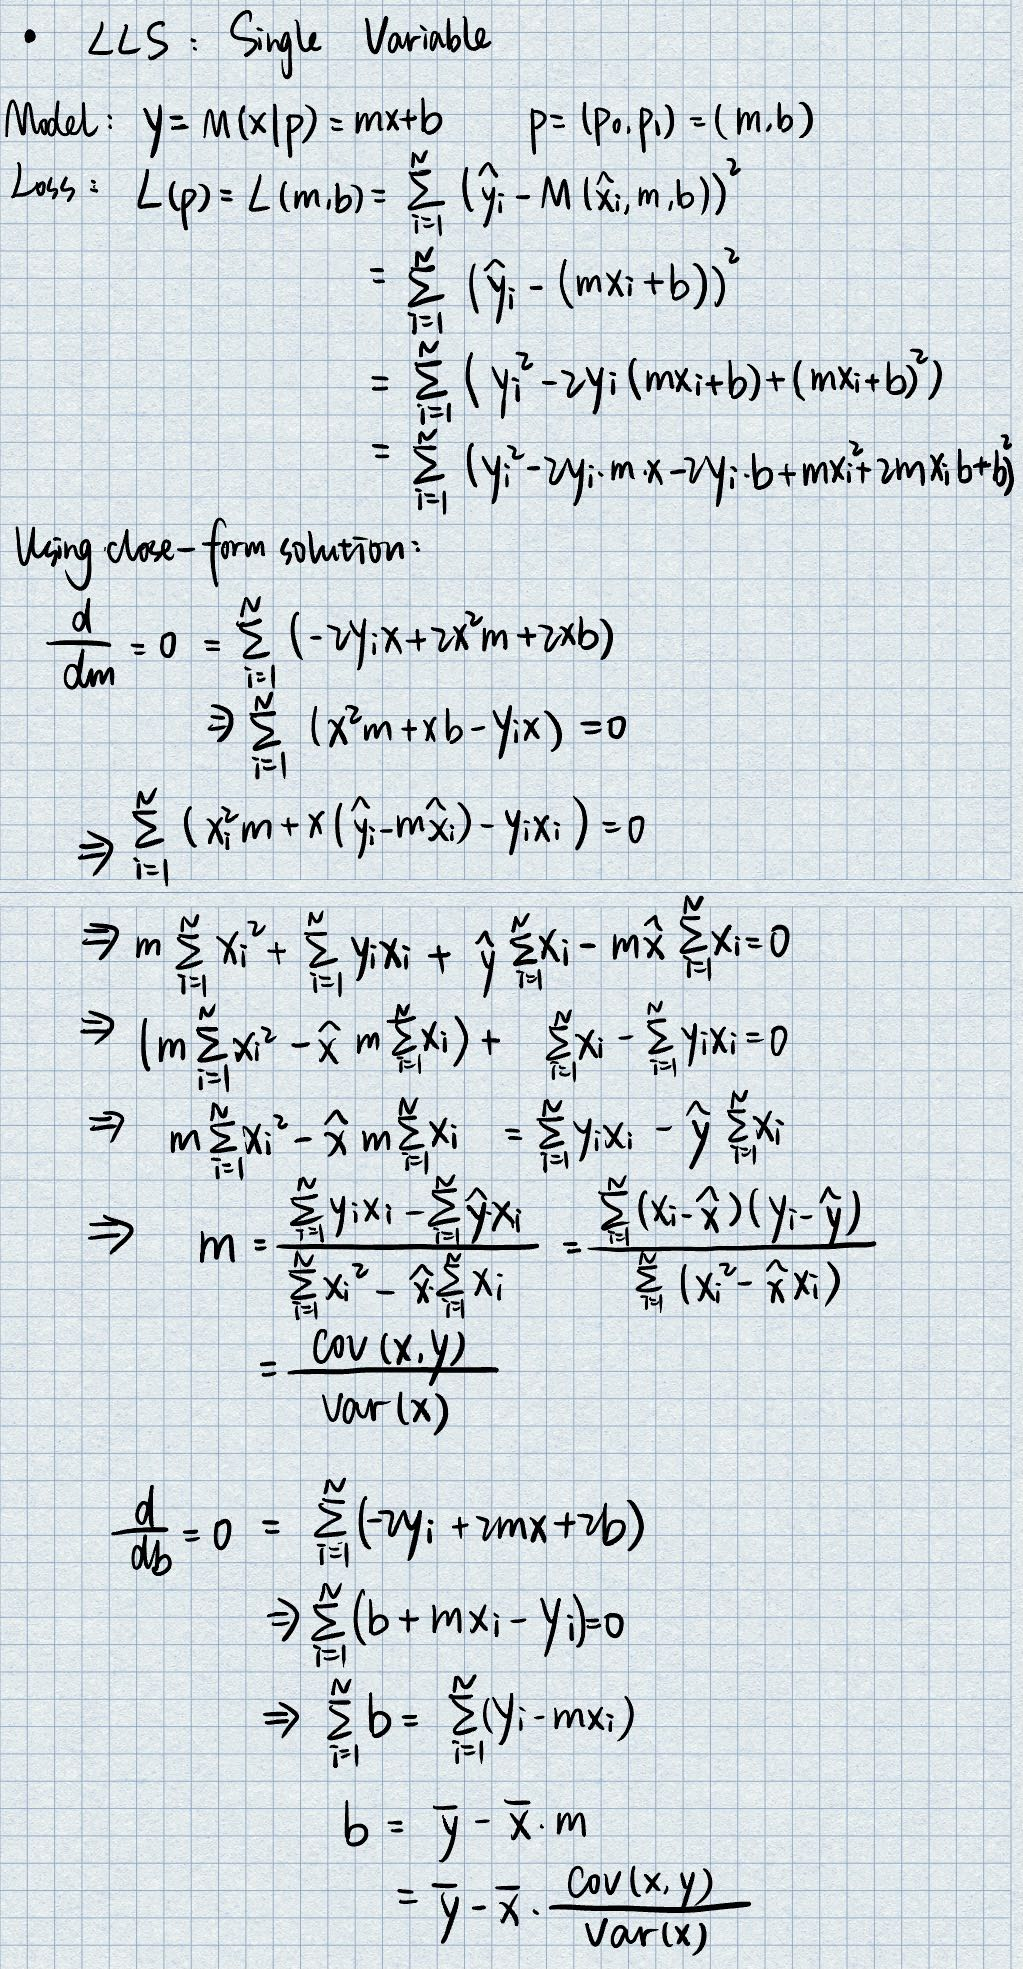

In [45]:
Image(filename='images/prob4_2.jpeg', width=700)